In [12]:
import jax.numpy as jnp

import pandas as pd

import make_df

import matplotlib.pyplot as plt

In [13]:
def fun(x):
    return (x[:,0]**2 + x[:,1] - 11)**2 / 800.0 + (x[:,0] + x[:,1]**2 -7)**2 / 800.0

In [14]:
# sparsification
sparse = True
subset_size = 0.1

if sparse:
    # directory where to save stuff
    # in_dir = "./sparse"
    in_dir = "./sparse/fullpoints"
    # How many derivative observations should be chosen
    list_d_vals = [200, 400, 800, 1500, 2000, 3000]
    list_d_vals = [50, 100, 200, 400, 800, 1500, 2000]
    # optimizer type
    optimizers = ["L-BFGS-B", "TNC", "SLSQP"]
else:
    # directory where to save stuff
    in_dir = "./full"
    # How many derivative observations should be chosen
    list_d_vals = [5, 20, 50, 100, 200, 400, 800, 1500, 2000]
    # optimizer type
    optimizers = ["L-BFGS-B", "SLSQP"]

# name of the function
name = "him"

# How many function observations should be chosen
# list_f_vals = [1, 5, 20, 50]
list_f_vals = [0,]

# optimizer type
iters_per_optimmizer = 10

# Grid on which to evaluate the function
bounds = jnp.array([[-5.0, -5.0], [5.0, 5.0]])
eval_grid = jnp.linspace(bounds[0], bounds[1],100).T
eval_grid = jnp.array(jnp.meshgrid(*eval_grid)).reshape(2,-1).T

In [15]:
# data = make_df.make_df(list_f_vals, list_d_vals, optimizers, in_dir, name, sparse, subset_size, fun, eval_grid)
data = make_df.make_df_all(list_d_vals, optimizers, in_dir, name, sparse, subset_size, fun, eval_grid)

In [16]:
data.head(5)

,f,opt,mses,maxerrs,maxstds,true_in_confs,mean_mse,max_mse,min_mse,mean_tic,max_tic,min_tic
0,50,L-BFGS-B,"[0.03472828, 0.017778657, 0.01360079, 0.013220...","[0.733464, 0.77899027, 0.8519256, 0.43799227, ...","[nan, 1.7686154, 0.52467597, 0.6381149, 0.4585...","[0.0, 0.996, 0.5535, 0.5236, 0.34309998, 0.390...",0.018186368,0.03472828,0.010830199,0.37750998,0.996,0.0
1,50,TNC,"[0.023871249, 0.023756837, 0.015151132, 0.0270...","[1.0621841, 1.0796763, 0.622524, 1.0104187, 0....","[nan, 2.2329874, nan, nan, 1.1462814, 0.250926...","[0.0, 0.9923, 0.0, 0.0, 0.71889997, 0.3098, 0....",0.019555375,0.027055884,0.013727652,0.24197999,0.9923,0.0
2,50,SLSQP,"[0.0131254755, 0.022519063, 0.017816443, 0.025...","[0.40363467, 0.791211, 0.87419933, 1.1723297, ...","[nan, 0.11628208, 0.17922877, 0.07783913, 0.12...","[0.0, 0.2015, 0.2802, 0.2061, 0.29569998, 0.39...",0.016775636,0.025609085,0.010741335,0.41099,0.9819,0.0
3,100,L-BFGS-B,"[0.026811229, 0.022997048, 0.0060324785, 0.011...","[1.0796478, 1.0840529, 0.61104107, 0.57215333,...","[2.758429, 2.1066794, 0.24318704, 0.07791341, ...","[0.9989, 0.9932, 0.4516, 0.15519999, 0.0, 0.0,...",0.0112053035,0.026811229,0.0021524592,0.60943,0.9989,0.0
4,100,TNC,"[0.0030156854, 0.0066932198, 0.004080191, 0.03...","[0.5335462, 0.8183403, 0.48503566, 1.0846192, ...","[nan, 1.6123493, nan, nan, nan, 1.5543209, nan...","[0.0, 0.97709996, 0.0, 0.0, 0.0, 0.9946, 0.0, ...",0.016414938,0.051786277,0.0018110641,0.19717,0.9946,0.0


In [17]:
# colors = ["b", "r", "g", "cyan"]

# if sparse:
#     fig, ax = plt.subplots(2, 3, figsize=(15, 10))
# else:
#     fig, ax = plt.subplots(2, 2, figsize=(12, 10))

# for i, optimizer in enumerate(optimizers):
#     opt_data = data[data["opt"] == optimizer]
#     for c,f in zip(colors, opt_data["f"].unique()):
#         temp = opt_data[opt_data["f"] == f]
#         dvals = temp["d"]

#         mean_mse = temp["mean_mse"]
#         min_mse = temp["min_mse"]
#         max_mse = temp["max_mse"]
#         ax[0,i].plot(dvals, mean_mse, color=c, ls="--", marker="x", label=f"#f-vals = {f}")
#         ax[0,i].fill_between(dvals, min_mse.tolist(), max_mse.tolist(), color=c, alpha=0.2)
#         ax[0,i].set_yscale("log")
#         ax[0,i].set_xscale("log")

#         mean_tic = temp["mean_tic"]
#         min_tic = temp["min_tic"]
#         max_tic = temp["max_tic"]
#         ax[1,i].plot(dvals, mean_tic, color=c, ls="--", marker="x", label=f"#f-vals = {f}")
#         ax[1,i].fill_between(dvals, min_tic.tolist(), max_tic.tolist(), color=c, alpha=0.2)


#     ax[0,i].grid()
#     ax[1,i].grid()
#     ax[0,i].legend()
#     ax[1,i].legend()
#     ax[1,i].set_xlabel("#d-vals")
#     ax[0,0].set_ylabel("MSE")
#     ax[1,0].set_ylabel("% Y inside conf.-interval")
#     ax[0,i].set_title(optimizer)

0      0.018186368
3     0.0112053035
6              nan
9              nan
12             nan
15             nan
18             nan
Name: mean_mse, dtype: object
1     0.019555375
4     0.016414938
7             nan
10            nan
13            nan
16            nan
19            nan
Name: mean_mse, dtype: object
2     0.016775636
5       150754.36
8             nan
11            nan
14            nan
17            nan
20            nan
Name: mean_mse, dtype: object


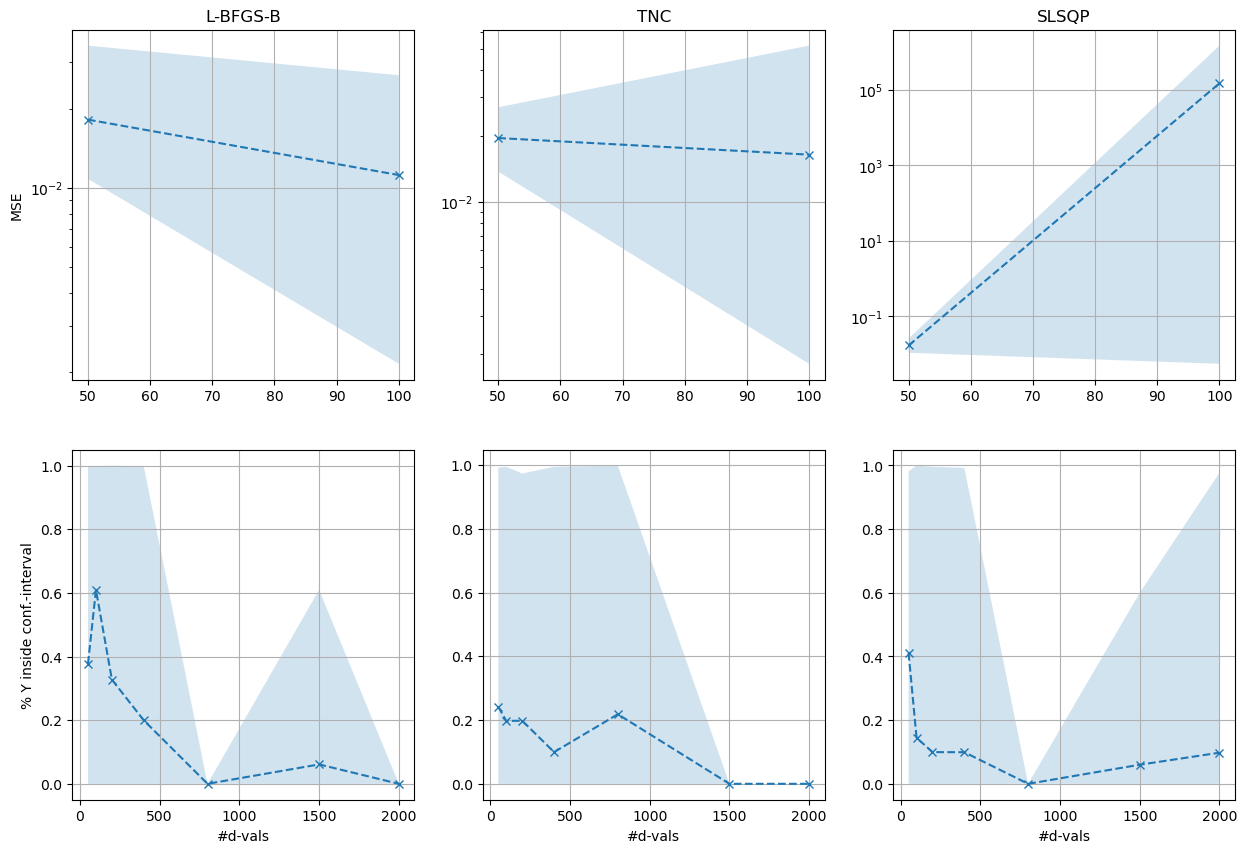

In [20]:
colors = ["b", "r", "g", "cyan"]

if sparse:
    fig, ax = plt.subplots(2, 3, figsize=(15, 10))
else:
    fig, ax = plt.subplots(2, 2, figsize=(12, 10))

for i, optimizer in enumerate(optimizers):
    opt_data = data[data["opt"] == optimizer]
    vals = opt_data["f"]

    mean_mse = opt_data["mean_mse"]
    print(mean_mse)
    min_mse = opt_data["min_mse"]
    max_mse = opt_data["max_mse"]
    ax[0,i].plot(vals, mean_mse, ls="--", marker="x")
    ax[0,i].fill_between(vals, min_mse.tolist(), max_mse.tolist(), alpha=0.2)
    ax[0,i].set_yscale("log")
    # ax[0,i].set_xscale("log")

    mean_tic = opt_data["mean_tic"]
    min_tic = opt_data["min_tic"]
    max_tic = opt_data["max_tic"]
    ax[1,i].plot(vals, mean_tic, ls="--", marker="x")
    ax[1,i].fill_between(vals, min_tic.tolist(), max_tic.tolist(), alpha=0.2)


    ax[0,i].grid()
    ax[1,i].grid()
    ax[1,i].set_xlabel("#d-vals")
    ax[0,0].set_ylabel("MSE")
    ax[1,0].set_ylabel("% Y inside conf.-interval")
    ax[0,i].set_title(optimizer)